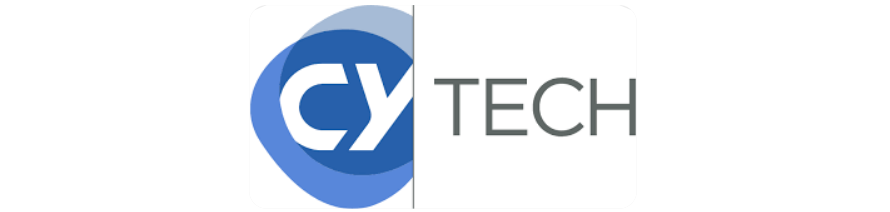

# FINTECH 
   
# *Programmation pour la finance*

## Travail à faire – Assurance de portefeuille ou « Stop loss »

### Veuillez créer un objet en Python afin de simuler le processus de prix d’un actif, à partir de la fonction de discrétisation d’un processus brownien géométrique (équation A.6). Votre programme permet également de générer un rendu visuel de vos données simulées.

#### Bibliothèques

In [13]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\3566621945.py:100: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


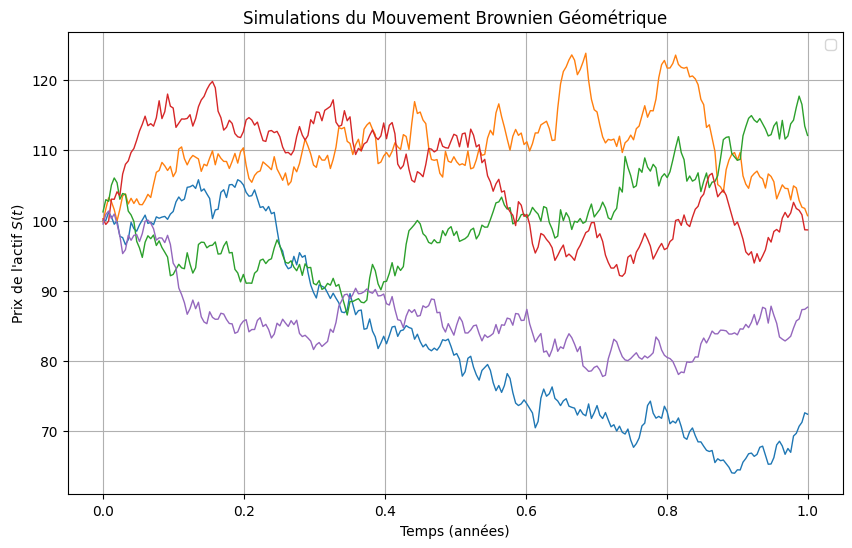

Statistiques empiriques sur S(T) après 5 simulations :
Espérance empirique : 94.3168
Écart-type empirique : 13.4063
Statistiques empiriques sur S(T) après 100000 simulations :
Espérance empirique : 105.1532
Écart-type empirique : 21.2665


c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


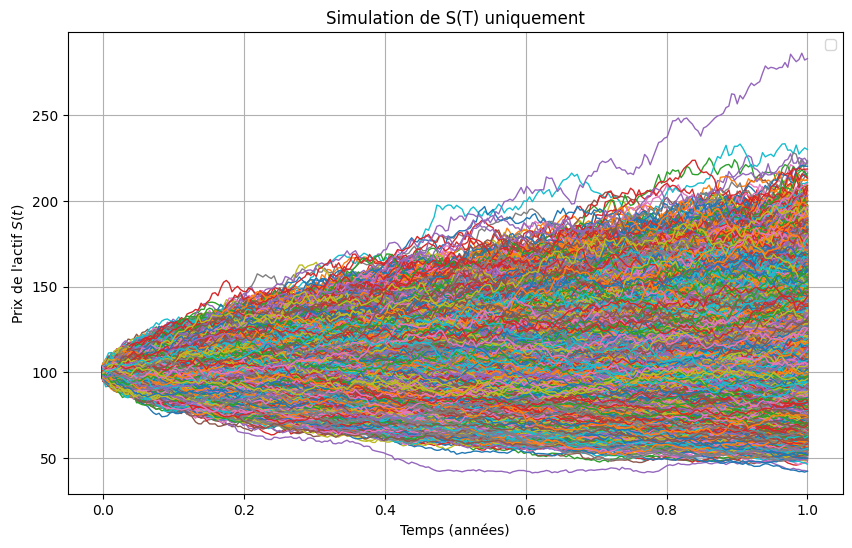

In [75]:
class ProcessusBrownienGeometrique:
    """
    Classe pour simuler le prix d’un actif selon un Mouvement Brownien Géométrique (MBG)
    en utilisant la formule discrétisée d'Euler.
    """

    def __init__(self, S0, r, sigma, T, N, nb_simulations):
        """
        Initialisation des paramètres du modèle.
        
        Paramètres :
        - S0 : float
            Prix initial de l'actif.
        - r : float
            Taux sans risque (en décimal).
        - sigma : float
            Volatilité de l'actif sous-jacent (en décimal).
        - T : float
            Horizon temporel (en années).
        - N : int
            Nombre de pas de discrétisation.
        - nb_simulations : int
            Nombre de trajectoires à simuler.
        """
        self.S0 = S0
        self.r = r
        self.sigma = sigma
        self.T = T
        self.N = N
        self.nb_simulations = nb_simulations
        self.dt = T / N  # Durée de chaque intervalle de temps
        self.chemins_simules = None

    def simuler(self, simuler_terminal_only=False):
        """
        Simule les trajectoires du processus brownien géométrique pour l'actif sous-jacent.
        Utilise l'approximation d'Euler pour discrétiser l'équation du mouvement brownien géométrique.
        
        Paramètres :
        - simuler_terminal_only : bool
            Si True, ne calcule que les prix terminaux S(T) sans stocker les trajectoires complètes.
        """
        # Variables aléatoires normales (les processus de Wiener)
        aleatoires = np.random.normal(size=(self.nb_simulations, self.N))
        
        # Calcul des incréments du processus brownien géométrique
        increments = (self.r - 0.5 * self.sigma ** 2) * self.dt + self.sigma * np.sqrt(self.dt) * aleatoires
        
        # Trajectoires logarithmiques
        chemins_log = np.log(self.S0) + np.cumsum(increments, axis=1)
        
        # Reconstitution des prix à partir des log-prix
        if simuler_terminal_only:
            self.S_terminal = np.exp(chemins_log[:, -1])
            self.chemins_simules = None
        else:
            self.chemins_simules = np.exp(chemins_log)
            self.S_terminal = self.chemins_simules[:, -1]
        
        return self.chemins_simules if not simuler_terminal_only else self.S_terminal
    
    def afficher_statistiques(self):
        """
        Affiche l'espérance et l'écart-type empirique de S(T).
        """
        if self.S_terminal is None:
            print("Aucune simulation trouvée. Exécutez d'abord la méthode simuler().")
            return

        moyenne = np.mean(self.S_terminal)
        ecart_type = np.std(self.S_terminal)

        print(f"Statistiques empiriques sur S(T) après {self.nb_simulations} simulations :")
        print(f"Espérance empirique : {moyenne:.4f}")
        print(f"Écart-type empirique : {ecart_type:.4f}")

    def tracer(self, title="Simulations du Mouvement Brownien Géométrique"):
        """
        Affiche les trajectoires simulées du prix de l’actif.
        """
        if self.chemins_simules is None:
            self.simuler()  # Si les trajectoires n'ont pas encore été simulées, on les génère d'abord

        plt.figure(figsize=(10, 6))
        time = np.linspace(0, self.T, self.N)

        # Affichage de chaque trajectoire simulée
        for i in range(self.nb_simulations):
            plt.plot(time, self.chemins_simules[i], lw=1)

        # Détails du graphique
        plt.title(title)
        plt.xlabel("Temps (années)")
        plt.ylabel("Prix de l'actif $S(t)$")
        plt.grid(True)
        plt.legend()
        plt.show()

# Exemple d'utilisation
if __name__ == "__main__":
    # Paramètres du modèle
    S0 = 100       # Prix initial de l'actif
    r = 0.05       # Taux sans risque (5%)
    sigma = 0.2    # Volatilité (20%)
    T = 1          # Horizon temporel (1 an)
    N = 252        # Nombre de jours de bourse dans l'année (252 jours)
    nb_simulations = 5  # Nombre de trajectoires à simuler

    # Création d'un objet pour simuler le mouvement brownien géométrique
    mbg = ProcessusBrownienGeometrique(S0, r, sigma, T, N, nb_simulations)

    # Simuler les trajectoires
    mbg.simuler()

    # Afficher les trajectoires simulées
    mbg.tracer()

    mbg.afficher_statistiques()

    # --- Cas 2 : uniquement S(T) ---
    mbg = ProcessusBrownienGeometrique(S0, r, sigma, T, N, 100000)
    mbg.simuler(simuler_terminal_only=True)
    mbg.afficher_statistiques()
    mbg.tracer(title="Simulation de S(T) uniquement")

    # --- Cas 3 : S(T) avec une autre valeur de r ---
    mbg = ProcessusBrownienGeometrique(S0, 0.1, sigma, T, N, 100000)


### Veuillez concevoir un programme dont le but est d’appliquer cette stratégie d’allocations d’actifs. Quelle(s) limite(s) relevez-vous lors de l’application de cette stratégie ? Auriez-vous des solutions ou conseils à proposer à un investisseur ?

#### Bibliothèques

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\2634621142.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.plancher[0] = self.gain_protege_pct * max_rendement  # Le plancher est fixé à un pourcentage du rendement initial
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\2634621142.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.plancher[t] = self.gain_protege_pct * max_rendement  # Mise à jour du plancher de gain
C:\Users\CYTech Student\AppData\Local\Temp\ipykerne

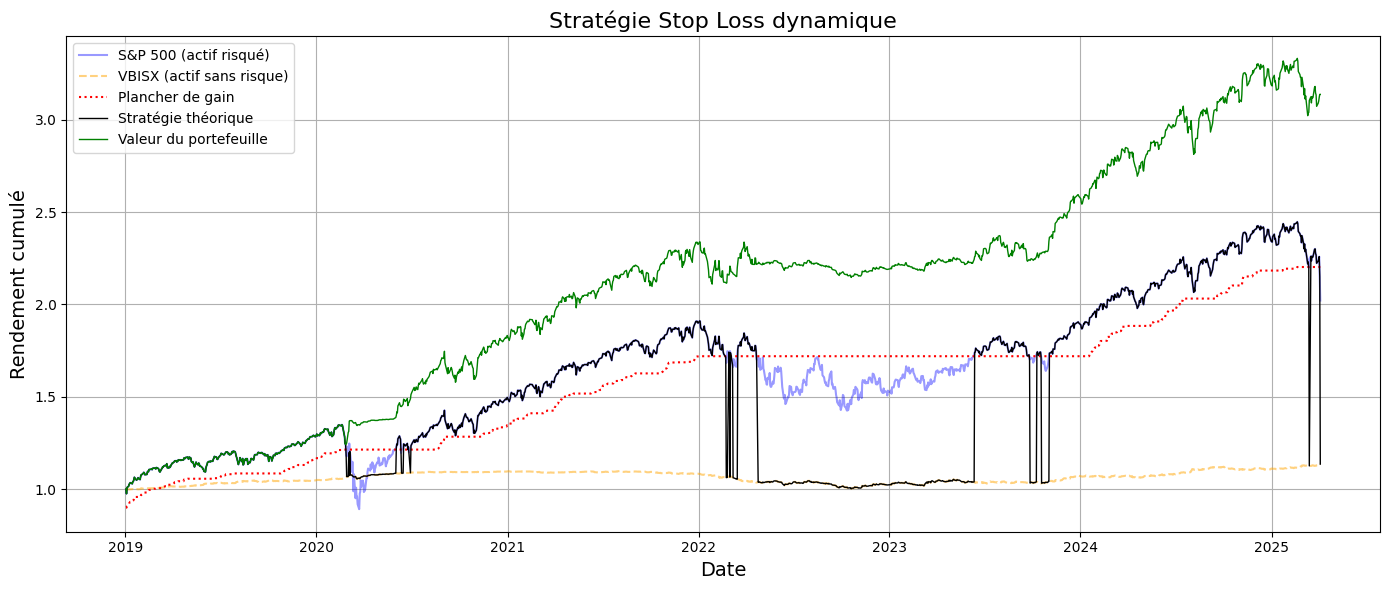

In [76]:
# Téléchargement des données financières des actifs risqué et sans risque
vbisx = yf.download("VBISX", start="2019-01-01")  # Téléchargement du prix de l'actif sans risque (VBISX)
sp500 = yf.download("^GSPC", start="2019-01-01")  # Téléchargement du prix de l'actif risqué (S&P 500)

# Fusion des données des deux actifs sur la même période
data = vbisx[['Close']].rename(columns={'Close': 'VBISX'}).join(
    sp500[['Close']].rename(columns={'Close': 'S&P500'}),
    how='inner'  # Jointure interne pour ne garder que les dates communes
)

# Extraction des prix des actifs risqué et sans risque
prix_risque = data["S&P500"].values  # Valeur de l'actif risqué (S&P 500)
prix_sans_risque = data["VBISX"].values  # Valeur de l'actif sans risque (VBISX)
dates = data.index  # Les dates de l'investissement

# Calcul des rendements relatifs des actifs par rapport à leur valeur initiale
rendement_risque = prix_risque / prix_risque[0]  # Rendement de l'actif risqué (S&P 500)
rendement_sans_risque = prix_sans_risque / prix_sans_risque[0]  # Rendement de l'actif sans risque (VBISX)

class StrategieStopLossGain:
    """
    Classe représentant la stratégie de stop-loss pour garantir un certain pourcentage du gain.
    """

    def __init__(self, rendement_risque, rendement_sans_risque, dates, gain_protege_pct):
        """
        Initialisation des paramètres de la stratégie.
        
        Paramètres :
        - rendement_risque : Array des rendements relatifs de l'actif risqué (S&P 500)
        - rendement_sans_risque : Array des rendements relatifs de l'actif sans risque (VBISX)
        - dates : Index des dates pour l'évolution des rendements
        - gain_protege_pct : Pourcentage du gain à garantir à la fin de l'horizon de l'investissement
        """
        self.rendement_risque = rendement_risque
        self.rendement_sans_risque = rendement_sans_risque
        self.dates = dates
        self.N = len(rendement_risque)  # Nombre de périodes (jours)
        self.gain_protege_pct = gain_protege_pct  # Pourcentage à garantir du placement initial

        # Initialisation des variables pour suivre la valeur du portefeuille et du plancher de gain
        self.plancher = np.zeros(self.N)
        self.valeur_portefeuille_theorique = np.ones(self.N)
        self.valeur_portefeuille_capitalisee = np.ones(self.N)
        self.positions = ["risque"] * self.N  # Liste de positions (risque ou sans risque)

    def appliquer_strategie(self):
        """
        Applique la stratégie de stop-loss dynamique en fonction des rendements des actifs.
        """
        max_rendement = self.rendement_risque[0]  # Le rendement maximal au début est égal au rendement initial
        self.plancher[0] = self.gain_protege_pct * max_rendement  # Le plancher est fixé à un pourcentage du rendement initial
        dans_actif_risque = True  # On commence en investissant dans l'actif risqué

        # Parcours des périodes pour appliquer la stratégie à chaque étape
        for t in range(1, self.N):
            max_rendement = max(max_rendement, self.rendement_risque[t])  # Mise à jour du rendement maximal observé
            self.plancher[t] = self.gain_protege_pct * max_rendement  # Mise à jour du plancher de gain

            # Récupération des rendements précédents pour les calculs
            r_risk_prev = self.rendement_risque[t - 1] if self.rendement_risque[t - 1] != 0 else 1
            r_safe_prev = self.rendement_sans_risque[t - 1] if self.rendement_sans_risque[t - 1] != 0 else 1

            # === Mise à jour de la valeur théorique du portefeuille en fonction de la position actuelle ===
            if dans_actif_risque:
                self.valeur_portefeuille_theorique[t] = self.rendement_risque[t]
            else:
                self.valeur_portefeuille_theorique[t] = self.rendement_sans_risque[t]

            # === Mise à jour de la valeur capitalisée ===
            if dans_actif_risque:
                if self.rendement_risque[t] < self.plancher[t]:
                    # Transition vers l'actif sans risque si la condition du stop-loss est remplie
                    dans_actif_risque = False
                    self.positions[t:] = ["sans_risque"] * (self.N - t)
                    croissance = self.rendement_sans_risque[t] / r_safe_prev
                else:
                    croissance = self.rendement_risque[t] / r_risk_prev
            else:
                if self.rendement_risque[t] > self.plancher[t]:
                    # Retour à l'actif risqué si la condition est remplie
                    dans_actif_risque = True
                    self.positions[t:] = ["risque"] * (self.N - t)
                    croissance = self.rendement_risque[t] / r_risk_prev
                else:
                    croissance = self.rendement_sans_risque[t] / r_safe_prev

            # Mise à jour de la valeur capitalisée du portefeuille en fonction de la croissance
            self.valeur_portefeuille_capitalisee[t] = self.valeur_portefeuille_capitalisee[t - 1] * croissance

    def afficher_allocation(self):
        """
        Affiche les résultats de la stratégie avec une visualisation améliorée du portefeuille.
        """
        plt.figure(figsize=(14, 6))
        
        # Affichage des rendements des actifs risqué et sans risque
        plt.plot(self.dates, self.rendement_risque, label="S&P 500 (actif risqué)", color='blue', alpha=0.4)
        plt.plot(self.dates, self.rendement_sans_risque, label="VBISX (actif sans risque)", linestyle='--', alpha=0.5, color='orange')

        # Affichage du plancher de gain
        plt.plot(self.dates, self.plancher, label="Plancher de gain", linestyle=':', color='red')

        # Affichage de la valeur théorique du portefeuille suivant la stratégie
        plt.plot(self.dates, self.valeur_portefeuille_theorique, label="Stratégie théorique", color='black', linewidth=1)
        
        # Affichage de la valeur capitalisée du portefeuille
        plt.plot(self.dates, self.valeur_portefeuille_capitalisee, label="Valeur du portefeuille", color='green', linewidth=1)

        # Titre et axes
        plt.title("Stratégie Stop Loss dynamique", fontsize=16)
        plt.xlabel("Date", fontsize=14)
        plt.ylabel("Rendement cumulé", fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# Paramètres de la stratégie : définition du pourcentage du gain à protéger (ici 90%)
strategie = StrategieStopLossGain(rendement_risque, rendement_sans_risque, dates, gain_protege_pct=0.9)

# Appliquer la stratégie
strategie.appliquer_strategie()

# Afficher l'allocation de la stratégie
strategie.afficher_allocation()

### Frais de transactions

#### Bibliothèques

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\1907763946.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.plancher[0] = self.gain_protege_pct * max_rendement  # Plancher initial basé sur ce rendement
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\1907763946.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.plancher[t] = self.gain_protege_pct * max_rendement
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\1907763946.py:55: DeprecationWarning: Conversio

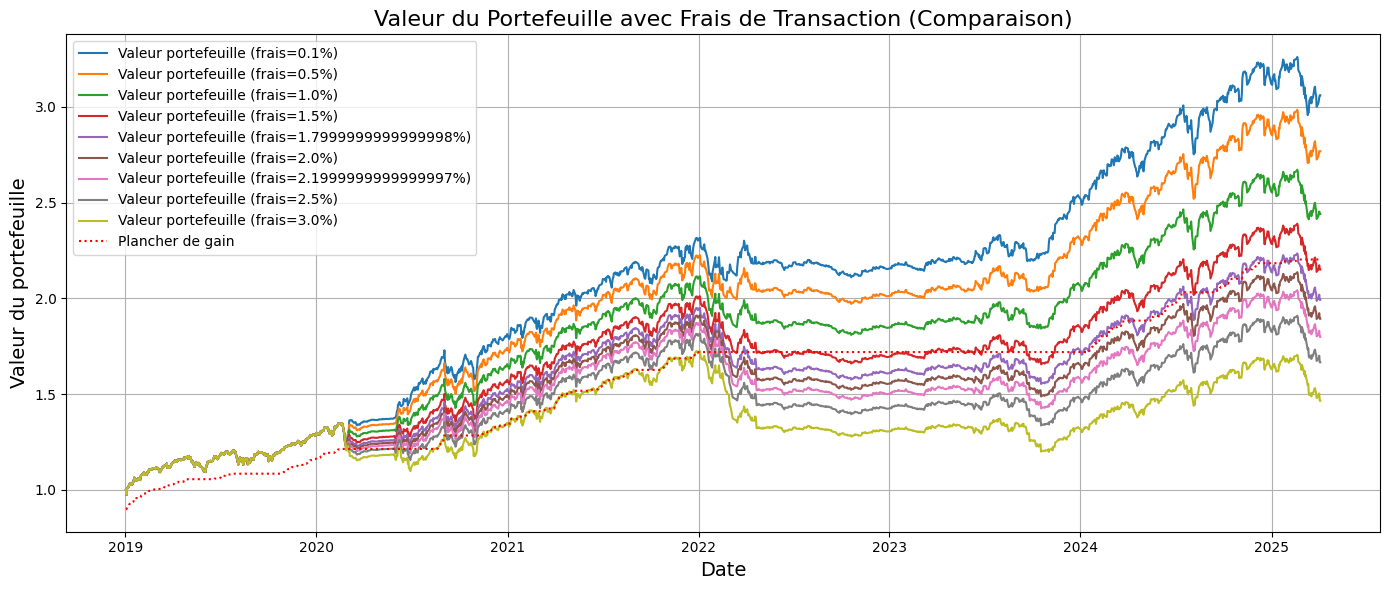

In [69]:
# Téléchargement des données financières des actifs risqué (S&P500) et sans risque (VBISX)
vbisx = yf.download("VBISX", start="2019-01-01")
sp500 = yf.download("^GSPC", start="2019-01-01")

# Construction d'un DataFrame contenant les prix de clôture des deux actifs
data = vbisx[['Close']].rename(columns={'Close': 'VBISX'}).join(
    sp500[['Close']].rename(columns={'Close': 'S&P500'}),
    how='inner'
)

# Extraction des prix en tant que tableaux NumPy
prix_risque = data["S&P500"].values
prix_sans_risque = data["VBISX"].values
dates = data.index

# Calcul des rendements relatifs (normalisés à 1 au départ)
rendement_risque = prix_risque / prix_risque[0]
rendement_sans_risque = prix_sans_risque / prix_sans_risque[0]

# Définition de la classe de stratégie Stop-Loss avec frais de transaction
class StrategieStopLossGainAvecFrais:
    def __init__(self, rendement_risque, rendement_sans_risque, dates, gain_protege_pct, frais_transaction):
        self.rendement_risque = rendement_risque
        self.rendement_sans_risque = rendement_sans_risque
        self.dates = dates
        self.N = len(rendement_risque)
        self.gain_protege_pct = gain_protege_pct
        self.frais_transaction = frais_transaction  # Pourcentage des frais lors des transitions

        # Initialisation des vecteurs pour le plancher, la valeur du portefeuille théorique et réelle
        self.plancher = np.zeros(self.N)
        self.valeur_portefeuille_theorique = np.ones(self.N)
        self.valeur_portefeuille_capitalisee = np.ones(self.N)
        self.positions = ["risque"] * self.N  # Historique des positions : "risque" ou "sans_risque"

    def appliquer_strategie(self):
        """
        Applique la stratégie dynamique avec stop-loss et prise en compte des frais de transaction
        """
        max_rendement = self.rendement_risque[0]  # Rendement max initial (valeur de référence)
        self.plancher[0] = self.gain_protege_pct * max_rendement  # Plancher initial basé sur ce rendement
        dans_actif_risque = True  # Début dans l'actif risqué

        for t in range(1, self.N):
            # Mise à jour du rendement maximum atteint et du plancher correspondant
            max_rendement = max(max_rendement, self.rendement_risque[t])
            self.plancher[t] = self.gain_protege_pct * max_rendement

            # Valeurs de référence pour le rendement précédent (évite division par zéro)
            r_risk_prev = self.rendement_risque[t - 1] if self.rendement_risque[t - 1] != 0 else 1
            r_safe_prev = self.rendement_sans_risque[t - 1] if self.rendement_sans_risque[t - 1] != 0 else 1

            # Mise à jour de la valeur théorique selon la position actuelle
            if dans_actif_risque:
                self.valeur_portefeuille_theorique[t] = self.rendement_risque[t]
            else:
                self.valeur_portefeuille_theorique[t] = self.rendement_sans_risque[t]

            # Mise à jour de la valeur capitalisée avec frais selon la transition
            if dans_actif_risque:
                if self.rendement_risque[t] < self.plancher[t]:
                    # Basculer vers l'actif sans risque avec frais de transaction
                    dans_actif_risque = False
                    self.positions[t:] = ["sans_risque"] * (self.N - t)
                    croissance = self.rendement_sans_risque[t] / r_safe_prev * (1 - self.frais_transaction)
                else:
                    croissance = self.rendement_risque[t] / r_risk_prev
            else:
                if self.rendement_risque[t] > self.plancher[t]:
                    # Retour à l'actif risqué avec frais de transaction
                    dans_actif_risque = True
                    self.positions[t:] = ["risque"] * (self.N - t)
                    croissance = self.rendement_risque[t] / r_risk_prev * (1 - self.frais_transaction)
                else:
                    croissance = self.rendement_sans_risque[t] / r_safe_prev

            # Mise à jour finale de la valeur du portefeuille
            self.valeur_portefeuille_capitalisee[t] = self.valeur_portefeuille_capitalisee[t - 1] * croissance

    def afficher_allocation(self, label_frais):
        """
        Affiche la courbe de valeur du portefeuille pour une valeur donnée de frais de transaction.
        """
        plt.plot(self.dates, self.valeur_portefeuille_capitalisee, label=f"Valeur portefeuille (frais={label_frais}%)")

# Liste des taux de frais de transaction à tester (de 0.1% à 3%)
frais_de_transaction_list = [0.001, 0.005, 0.01, 0.015, 0.018, 0.02, 0.022, 0.025, 0.03]

# Initialisation de la figure matplotlib
plt.figure(figsize=(14, 6))

# Boucle sur chaque niveau de frais pour tester la robustesse de la stratégie
for frais in frais_de_transaction_list:
    strategie = StrategieStopLossGainAvecFrais(rendement_risque, rendement_sans_risque, dates, gain_protege_pct=0.9, frais_transaction=frais)
    strategie.appliquer_strategie()
    strategie.afficher_allocation(label_frais=frais * 100)  # Conversion du taux en pourcentage pour le label

# Tracé du plancher de gain (en rouge pointillé)
plt.plot(dates, strategie.plancher, label="Plancher de gain", linestyle=':', color='red')

# Personnalisation du graphique
plt.title("Valeur du Portefeuille avec Frais de Transaction (Comparaison)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Valeur du portefeuille", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Slippage

#### Bibliothèques

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_22328\3433058678.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.plancher[0] = self.gain_protege_pct * max_rendement  # Le plancher est fixé à un pourcentage du rendement initial
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_22328\3433058678.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.plancher[t] = self.gain_protege_pct * max_rendement  # Mise à jour du plancher de gain
C:\Users\CYTech Student\AppData\Local\Temp\ipykerne

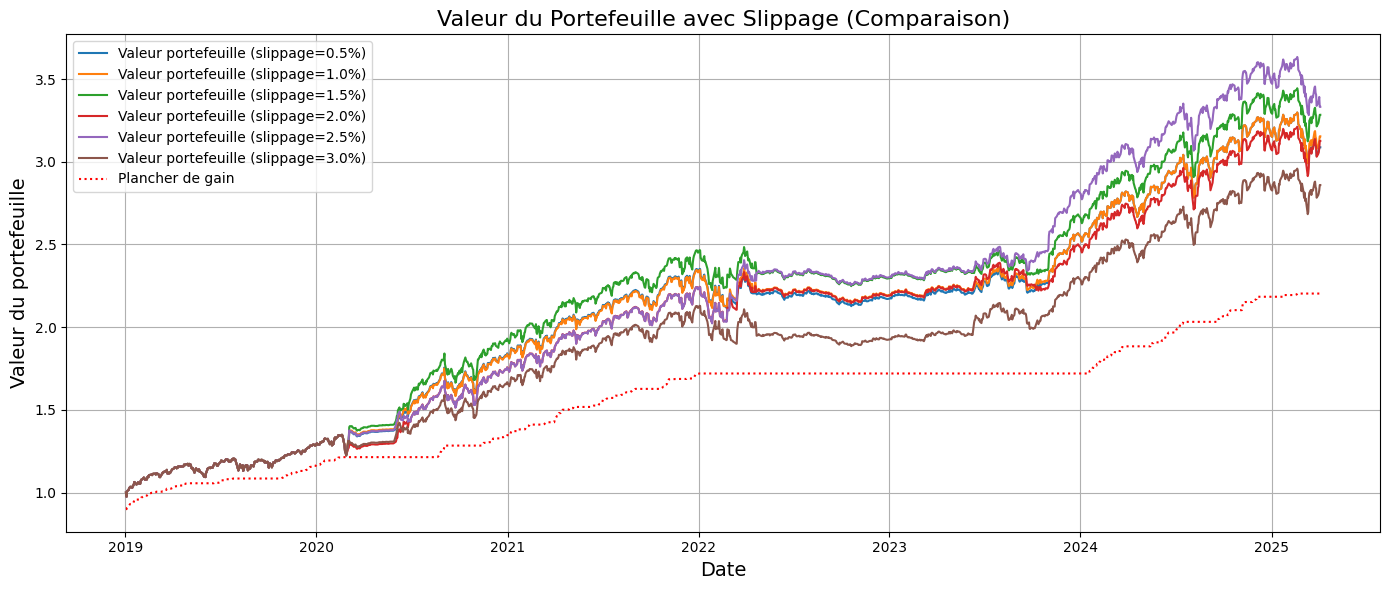

In [ ]:
# Téléchargement des données financières des actifs risqué et sans risque
vbisx = yf.download("VBISX", start="2019-01-01")
sp500 = yf.download("^GSPC", start="2019-01-01")

# Fusion des données des deux actifs sur la même période
data = vbisx[['Close']].rename(columns={'Close': 'VBISX'}).join(
    sp500[['Close']].rename(columns={'Close': 'S&P500'}),
    how='inner'  # Jointure interne pour ne garder que les dates communes
)

# Extraction des prix des actifs risqué et sans risque
prix_risque = data["S&P500"].values  # Valeur de l'actif risqué (S&P 500)
prix_sans_risque = data["VBISX"].values  # Valeur de l'actif sans risque (VBISX)
dates = data.index  # Les dates de l'investissement

# Calcul des rendements relatifs des actifs par rapport à leur valeur initiale
rendement_risque = prix_risque / prix_risque[0]  # Rendement de l'actif risqué (S&P 500)
rendement_sans_risque = prix_sans_risque / prix_sans_risque[0]  # Rendement de l'actif sans risque (VBISX)

class StrategieStopLossGainAvecSlippage:
    """
    Classe représentant la stratégie de stop-loss avec slippage pour garantir un certain pourcentage du gain.
    """

    def __init__(self, rendement_risque, rendement_sans_risque, dates, gain_protege_pct, frais_transaction, slippage_pct):
        """
        Initialisation des paramètres de la stratégie.
        
        Paramètres :
        - rendement_risque : Array des rendements relatifs de l'actif risqué (S&P 500)
        - rendement_sans_risque : Array des rendements relatifs de l'actif sans risque (VBISX)
        - dates : Index des dates pour l'évolution des rendements
        - gain_protege_pct : Pourcentage du gain à garantir à la fin de l'horizon de l'investissement
        - frais_transaction : Frais de transaction (en pourcentage)
        - slippage_pct : Pourcentage de slippage (écart entre le prix prévu et le prix réel)
        """
        self.rendement_risque = rendement_risque
        self.rendement_sans_risque = rendement_sans_risque
        self.dates = dates
        self.N = len(rendement_risque)  # Nombre de périodes (jours)
        self.gain_protege_pct = gain_protege_pct  # Pourcentage à garantir du placement initial
        self.frais_transaction = frais_transaction  # Frais de transaction
        self.slippage_pct = slippage_pct  # Pourcentage de slippage

        # Initialisation des variables pour suivre la valeur du portefeuille et du plancher de gain
        self.plancher = np.zeros(self.N)
        self.valeur_portefeuille_theorique = np.ones(self.N)
        self.valeur_portefeuille_capitalisee = np.ones(self.N)
        self.positions = ["risque"] * self.N  # Liste de positions (risque ou sans risque)

    def appliquer_slippage(self, prix):
        """
        Applique un slippage aléatoire sur le prix d'achat ou de vente.
        
        :param prix: Prix de l'actif avant slippage
        :return: Prix ajusté
        """
        return prix * (1 + np.random.uniform(-self.slippage_pct, self.slippage_pct))

    def appliquer_strategie(self):
        """
        Applique la stratégie de stop-loss dynamique avec slippage en fonction des rendements des actifs.
        """
        max_rendement = self.rendement_risque[0]
        self.plancher[0] = self.gain_protege_pct * max_rendement  # Le plancher est fixé à un pourcentage du rendement initial
        dans_actif_risque = True  # On commence en investissant dans l'actif risqué

        for t in range(1, self.N):
            max_rendement = max(max_rendement, self.rendement_risque[t])
            self.plancher[t] = self.gain_protege_pct * max_rendement  # Mise à jour du plancher de gain

            r_risk_prev = self.rendement_risque[t - 1] if self.rendement_risque[t - 1] != 0 else 1
            r_safe_prev = self.rendement_sans_risque[t - 1] if self.rendement_sans_risque[t - 1] != 0 else 1

            # === Mise à jour de la valeur théorique du portefeuille en fonction de la position actuelle ===
            if dans_actif_risque:
                self.valeur_portefeuille_theorique[t] = self.rendement_risque[t]
            else:
                self.valeur_portefeuille_theorique[t] = self.rendement_sans_risque[t]

            # === Mise à jour de la valeur capitalisée ===
            if dans_actif_risque:
                if self.rendement_risque[t] < self.plancher[t]:
                    # Transition vers l'actif sans risque, en appliquant le slippage
                    dans_actif_risque = False
                    self.positions[t:] = ["sans_risque"] * (self.N - t)
                    croissance = self.appliquer_slippage(self.rendement_sans_risque[t] / r_safe_prev)
                else:
                    croissance = self.rendement_risque[t] / r_risk_prev
            else:
                if self.rendement_risque[t] > self.plancher[t]:
                    # Retour à l'actif risqué, en appliquant le slippage
                    dans_actif_risque = True
                    self.positions[t:] = ["risque"] * (self.N - t)
                    croissance = self.appliquer_slippage(self.rendement_risque[t] / r_risk_prev)
                else:
                    croissance = self.rendement_sans_risque[t] / r_safe_prev

            # Mise à jour de la valeur capitalisée du portefeuille en fonction de la croissance ajustée pour slippage et frais
            self.valeur_portefeuille_capitalisee[t] = self.valeur_portefeuille_capitalisee[t - 1] * croissance

    def afficher_allocation(self, label_slippage):
        """
        Affiche la valeur du portefeuille avec différents slippages et la comparaison avec le plancher de gain.
        """
        # Affichage de la valeur du portefeuille au fil du temps
        plt.plot(self.dates, self.valeur_portefeuille_capitalisee, label=f"Valeur portefeuille (slippage={label_slippage}%)")

# Liste des niveaux de slippage à tester (par exemple 0.5%, 1%, 1.5%, 2%, 2.5%, 3%)
slippage_list = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]  # Slippage à tester

plt.figure(figsize=(14, 6))

# Appliquer la stratégie pour chaque niveau de slippage
for slippage in slippage_list:
    strategie = StrategieStopLossGainAvecSlippage(rendement_risque, rendement_sans_risque, dates, gain_protege_pct=0.9, frais_transaction=0.001, slippage_pct=slippage)
    strategie.appliquer_strategie()
    strategie.afficher_allocation(label_slippage=slippage * 100)  # Affiche la courbe avec le label du slippage en %

# Affichage du plancher de gain uniquement une fois
plt.plot(dates, strategie.plancher, label="Plancher de gain", linestyle=':', color='red')

# Affichage des détails du graphique
plt.title("Valeur du Portefeuille avec Slippage (Comparaison)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Valeur du portefeuille", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Taxes sur les gains en capital

#### Bibliothèques

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\2788332216.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.plancher[0] = self.gain_protege_pct * max_rendement
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\2788332216.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.plancher[t] = self.gain_protege_pct * max_rendement
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11012\2788332216.py:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is

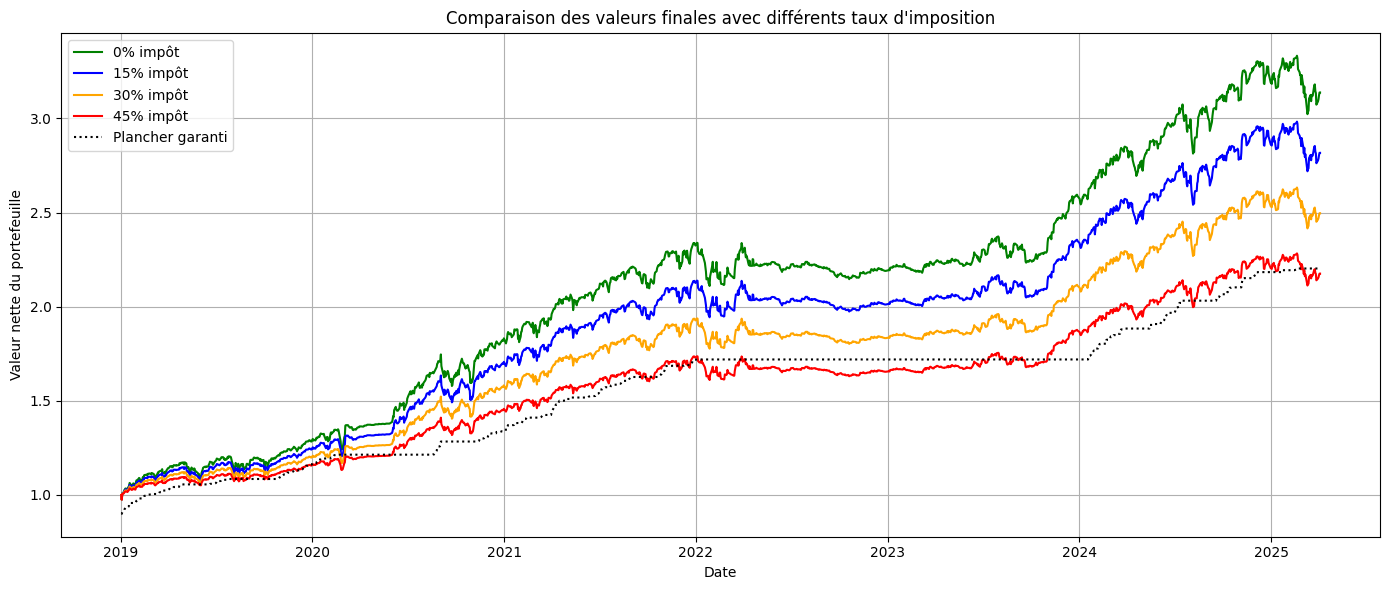


=== Résumé Comparatif Fiscalité ===
Taux d'imposition  Valeur finale brute  Valeur finale nette  Plancher garanti  Gain brut  Impôt payé  Surperformance nette vs plancher
               0%                3.138                3.138             2.203      2.138       0.000                             0.935
              15%                3.138                2.817             2.203      2.138       0.321                             0.614
              30%                3.138                2.497             2.203      2.138       0.641                             0.294
              45%                3.138                2.176             2.203      2.138       0.962                            -0.027


In [70]:
# ==== Chargement des données ====
# Téléchargement des données de l'actif sans risque (VBISX) et de l'actif risqué (S&P 500) depuis 2019
vbisx = yf.download("VBISX", start="2019-01-01")
sp500 = yf.download("^GSPC", start="2019-01-01")

# Construction d'un DataFrame combiné contenant les prix de clôture des deux actifs
data = vbisx[['Close']].rename(columns={'Close': 'VBISX'}).join(
    sp500[['Close']].rename(columns={'Close': 'S&P500'}),
    how='inner'
)

# Extraction des prix sous forme de tableaux NumPy
prix_risque = data["S&P500"].values
prix_sans_risque = data["VBISX"].values
dates = data.index  # Index temporel

# Calcul des rendements relatifs normalisés (base 1)
rendement_risque = prix_risque / prix_risque[0]
rendement_sans_risque = prix_sans_risque / prix_sans_risque[0]

# ==== Classe avec fiscalité ====
class StrategieStopLossGainFiscale:
    def __init__(self, rendement_risque, rendement_sans_risque, dates, gain_protege_pct, taux_imposition):
        self.rendement_risque = rendement_risque
        self.rendement_sans_risque = rendement_sans_risque
        self.dates = dates
        self.N = len(rendement_risque)
        self.gain_protege_pct = gain_protege_pct  # % du gain maximum à protéger
        self.taux_imposition = taux_imposition  # Taux d'imposition sur le gain

        # Initialisation des vecteurs : plancher, valeur brute et nette du portefeuille, position
        self.plancher = np.zeros(self.N)
        self.valeur_portefeuille_capitalisee = np.ones(self.N)
        self.valeur_nette_apres_impot = np.ones(self.N)
        self.positions = ["risque"] * self.N  # Historique des positions ("risque" ou "sans_risque")

    def appliquer_strategie(self):
        # Initialisation : rendement maximum atteint à t=0
        max_rendement = self.rendement_risque[0]
        self.plancher[0] = self.gain_protege_pct * max_rendement
        dans_actif_risque = True  # Position initiale : actif risqué

        for t in range(1, self.N):
            # Mise à jour du rendement max et du plancher de protection
            max_rendement = max(max_rendement, self.rendement_risque[t])
            self.plancher[t] = self.gain_protege_pct * max_rendement

            # Sécurité pour éviter division par zéro
            r_risk_prev = self.rendement_risque[t - 1] if self.rendement_risque[t - 1] != 0 else 1
            r_safe_prev = self.rendement_sans_risque[t - 1] if self.rendement_sans_risque[t - 1] != 0 else 1

            # Mise à jour de la position selon la stratégie de stop-loss
            if dans_actif_risque:
                if self.rendement_risque[t] < self.plancher[t]:
                    # Bascule vers actif sans risque
                    dans_actif_risque = False
                    self.positions[t:] = ["sans_risque"] * (self.N - t)
                    croissance = self.rendement_sans_risque[t] / r_safe_prev
                else:
                    croissance = self.rendement_risque[t] / r_risk_prev
            else:
                if self.rendement_risque[t] > self.plancher[t]:
                    # Retour à l'actif risqué
                    dans_actif_risque = True
                    self.positions[t:] = ["risque"] * (self.N - t)
                    croissance = self.rendement_risque[t] / r_risk_prev
                else:
                    croissance = self.rendement_sans_risque[t] / r_safe_prev

            # Mise à jour de la valeur brute du portefeuille (avant impôt)
            self.valeur_portefeuille_capitalisee[t] = self.valeur_portefeuille_capitalisee[t - 1] * croissance

            # Calcul de l'impôt et de la valeur nette après imposition
            gain_brut = self.valeur_portefeuille_capitalisee[t] - 1
            impot = self.taux_imposition * gain_brut if gain_brut > 0 else 0
            self.valeur_nette_apres_impot[t] = self.valeur_portefeuille_capitalisee[t] - impot

    def get_resultats_finaux(self):
        # Résumé des indicateurs clés à la fin de la stratégie
        return {
            "Taux d'imposition": f"{int(self.taux_imposition * 100)}%",
            "Valeur finale brute": round(self.valeur_portefeuille_capitalisee[-1], 3),
            "Valeur finale nette": round(self.valeur_nette_apres_impot[-1], 3),
            "Plancher garanti": round(self.plancher[-1], 3),
            "Gain brut": round(self.valeur_portefeuille_capitalisee[-1] - 1, 3),
            "Impôt payé": round(max(0, (self.valeur_portefeuille_capitalisee[-1] - 1) * self.taux_imposition), 3),
            "Surperformance nette vs plancher": round(self.valeur_nette_apres_impot[-1] - self.plancher[-1], 3)
        }

# ==== Taux d'imposition à tester ====
# Liste des taux d'imposition simulés : 0%, 15%, 30%, 45%
taux_imposition_liste = [0.0, 0.15, 0.30, 0.45]
couleurs = ["green", "blue", "orange", "red"]
resultats = []  # Liste pour stocker les résultats

# === Affichage graphique ===
plt.figure(figsize=(14, 6))

# Boucle sur chaque taux d'imposition
for taux, couleur in zip(taux_imposition_liste, couleurs):
    # Création et application de la stratégie avec fiscalité
    strat = StrategieStopLossGainFiscale(
        rendement_risque, rendement_sans_risque, dates,
        gain_protege_pct=0.9,
        taux_imposition=taux
    )
    strat.appliquer_strategie()
    res = strat.get_resultats_finaux()
    resultats.append(res)  # Stockage des résultats

    # Tracé de la courbe de valeur nette (après impôt)
    plt.plot(dates, strat.valeur_nette_apres_impot, label=f"{int(taux * 100)}% impôt", color=couleur)

# === Tracé du plancher de protection ===
plt.plot(dates, strat.plancher, label="Plancher garanti", linestyle=":", color="black")

# === Personnalisation du graphique ===
plt.title("Comparaison des valeurs finales avec différents taux d'imposition")
plt.xlabel("Date")
plt.ylabel("Valeur nette du portefeuille")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Résumé tabulaire des résultats ===
df_resultats = pd.DataFrame(resultats)
print("\n=== Résumé Comparatif Fiscalité ===")
print(df_resultats.to_string(index=False))

### Avant d’étudier la sensibilité des paramètres de la stratégie du « Stop-Loss », veuillez à partir des cours de marché de l’action Michelin présent dans le fichier texte « Michelin_20112023_20112024.csv », tracer, sur le même graphique, la représentation de la densité pour le titre Michelin ainsi que la densité gaussienne.

#### Bibliothèques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

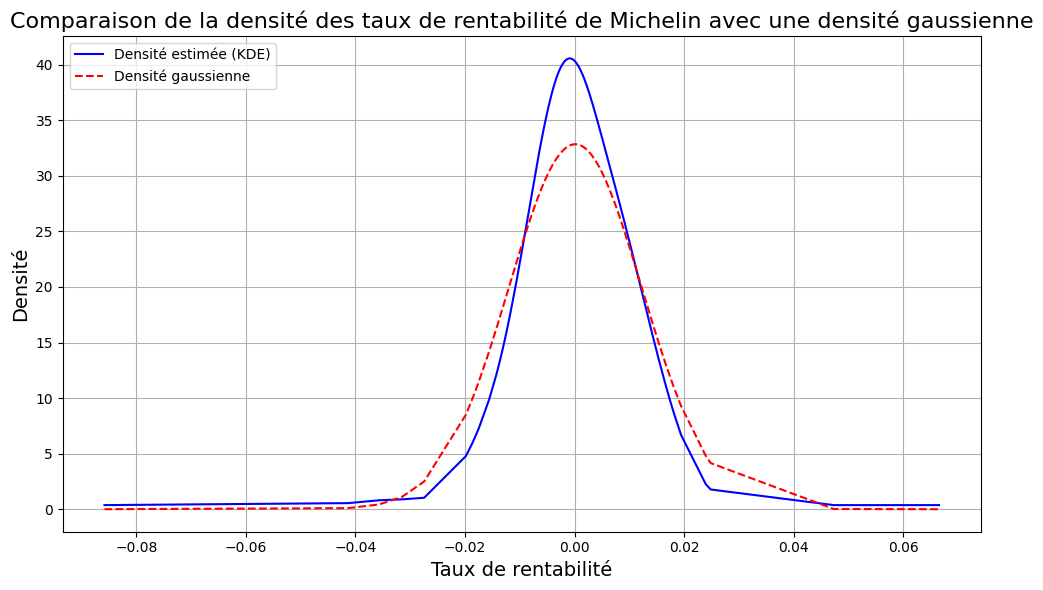

In [ ]:
# Charger les données du fichier CSV
data = pd.read_csv('H:\\Desktop\\Rapport_Programmation_Finance\\Michelin_20112023_20112024.csv', sep=';', header=None)
data.columns = ['ISIN', 'Date', 'Opening', 'High', 'Low', 'Closing', 'Volume']

# Convertir 'Closing' en numérique, remplacer ',' par '.' pour la conversion en float
data['Closing'] = data['Closing'].str.replace(',', '.').astype(float)

# Calcul des taux de rentabilité log (logarithmiques) entre les jours consécutifs
data['Returns'] = np.log(data['Closing'] / data['Closing'].shift(1))

# Nettoyage des valeurs aberrantes et NaN (par exemple, infinies ou NaN)
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Returns'])

# Trier les taux de rentabilité en ordre croissant
sorted_returns = np.sort(data['Returns'])

# Estimation de la densité par noyau gaussien (KDE) en utilisant la méthode Silverman pour le "bandwidth"
kde = gaussian_kde(sorted_returns, bw_method='silverman')
density_estimate = kde(sorted_returns)

# Densité gaussienne théorique pour comparaison (moyenne et écart-type des rendements observés)
gaussian_density = norm.pdf(sorted_returns, loc=np.mean(sorted_returns), scale=np.std(sorted_returns))

# Tracer les courbes de densité
plt.figure(figsize=(10, 6))
plt.plot(sorted_returns, density_estimate, label='Densité estimée (KDE)', color='blue', linewidth=1.5)
plt.plot(sorted_returns, gaussian_density, label='Densité gaussienne', color='red', linestyle='--', linewidth=1.5)

# Ajouter des titres, légendes et autres éléments de formatage
plt.title('Comparaison de la densité des taux de rentabilité de Michelin avec une densité gaussienne', fontsize=16)
plt.xlabel('Taux de rentabilité', fontsize=14)
plt.ylabel('Densité', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


### Veuillez concevoir un programme qui permet d’étudier la sensibilité de la distribution de la valeur terminale (ou valeur de la position à l’échéance) en fonction de différents niveaux de paramètres, en faisant tour à tour varier le niveau de tolérance retenu (1), la volatilité de l’actif risqué (2), le plancher garanti (3) et enfin la fréquence de recomposition du portefeuille (4)

#### Bibliothèques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

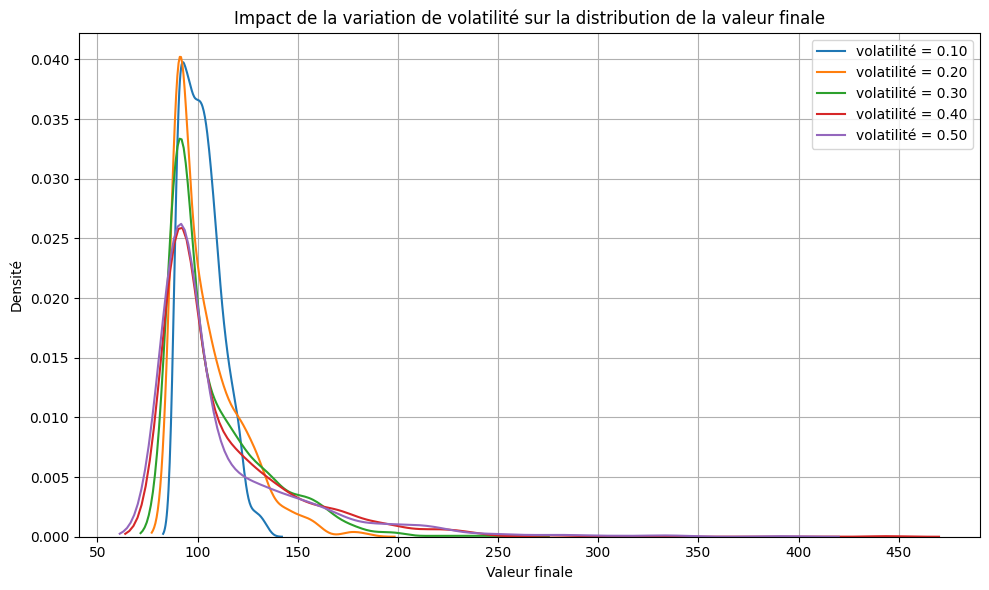

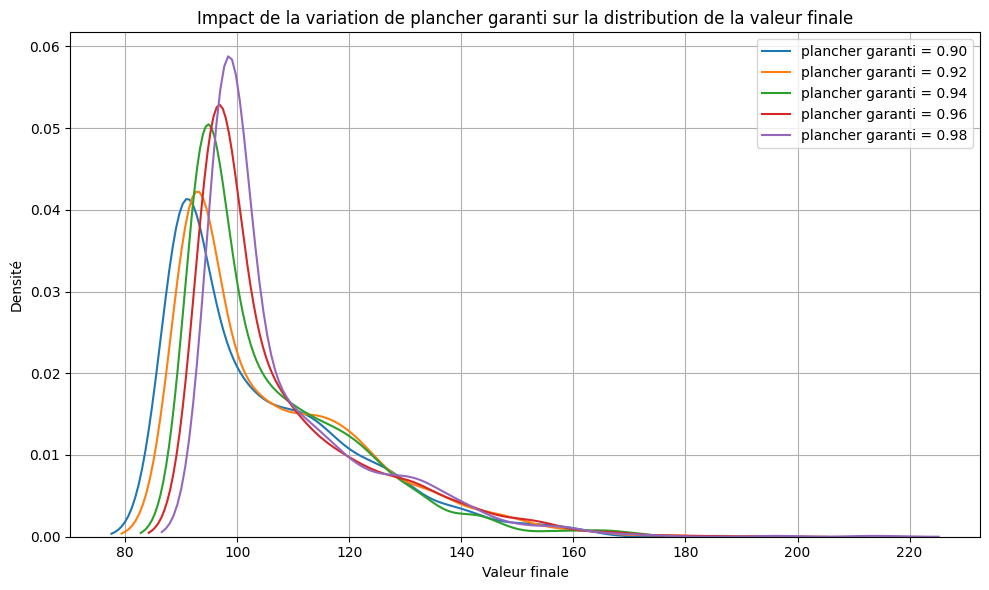

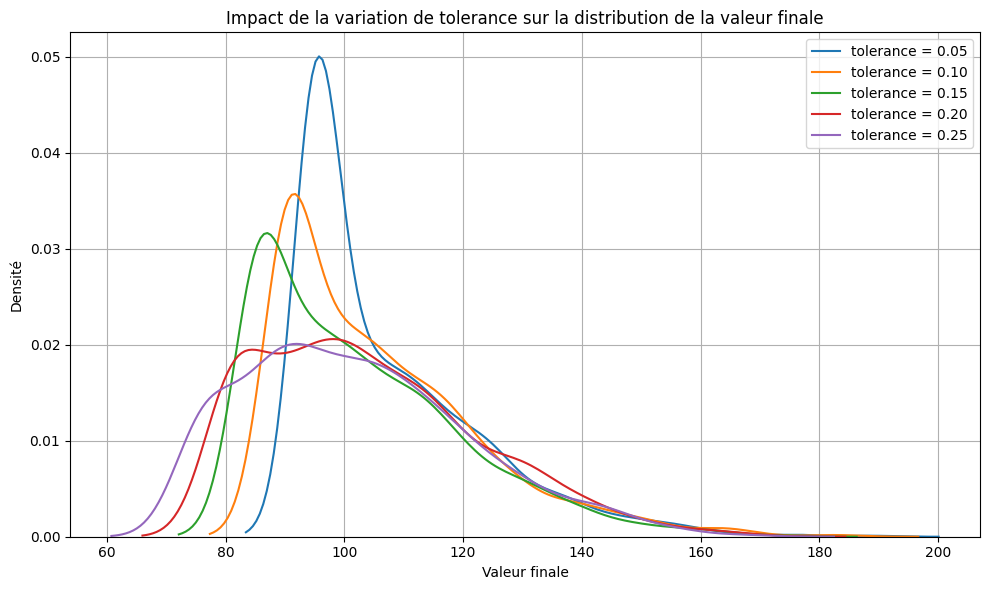

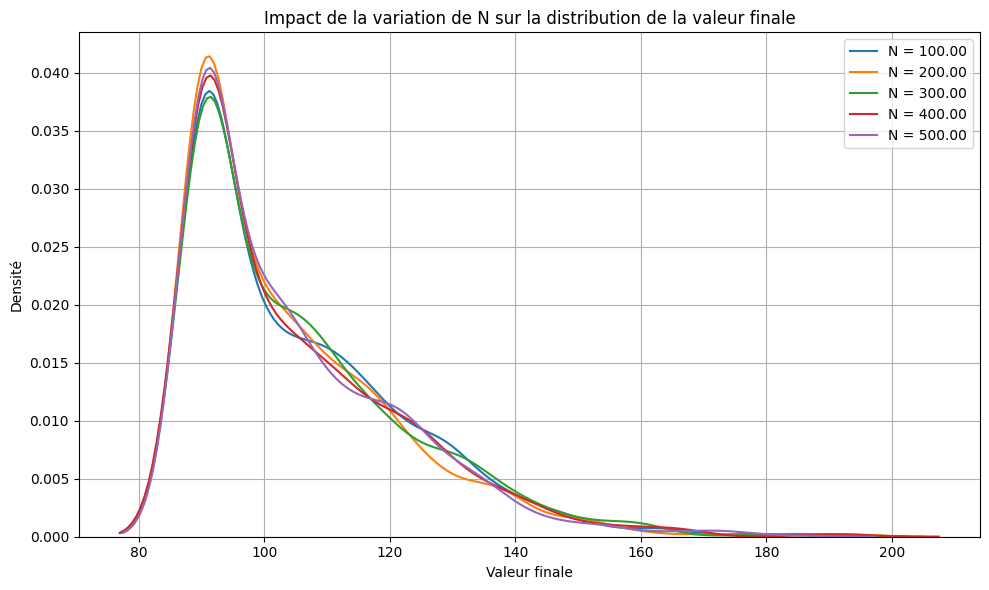

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulateur d'actif (mouvement brownien géométrique)
class AssetSimulator:
    def __init__(self, S0, r, sigma, T, N):
        self.S0 = S0
        self.r = r
        self.sigma = sigma
        self.T = T
        self.N = N
        self.dt = T / N

    def simulate_path(self):
        Z = np.random.normal(0, 1, self.N)
        log_returns = (self.r - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * Z
        log_price = np.log(self.S0) + np.cumsum(log_returns)
        return np.exp(log_price)

# Stratégie Stop-Loss
class StopLossStrategy:
    def __init__(self, S0, r, T, floor_pct, freq_rebalance):
        self.S0 = S0
        self.r = r
        self.T = T
        self.floor_pct = floor_pct
        self.freq_rebalance = freq_rebalance

    def apply(self, price_path):
        N = len(price_path)
        dt = self.T / N
        t = np.linspace(0, self.T, N)
        Mt = self.floor_pct * self.S0 * np.exp(-self.r * (self.T - t))
        position = 'risky'
        portfolio_value = []

        for i in range(N):
            if position == 'risky':
                val = price_path[i]
                if val < Mt[i]:
                    val = Mt[i]
                    position = 'safe'
            else:
                val = Mt[i]
                if price_path[i] > Mt[i]:
                    val = price_path[i]
                    position = 'risky'
            portfolio_value.append(val)

        return portfolio_value[-1]

# Analyse de sensibilité
def sensitivity_analysis(param_name, values, fixed_params, n_simulations=1000):
    param_title = {
        "sigma": "volatilité",
        "floor_pct": "plancher garanti",
        "freq_rebalance": "tolerance",
        "N": "N"
    }.get(param_name, param_name)

    plt.figure(figsize=(10, 6))
    for val in values:
        terminal_values = []

        for _ in range(n_simulations):
            S0 = fixed_params["S0"]
            r = fixed_params["r"]
            T = fixed_params["T"]
            N = fixed_params["N"]
            sigma = fixed_params["sigma"]
            floor_pct = fixed_params["floor_pct"]
            freq = fixed_params["freq_rebalance"]

            if param_name == "sigma":
                sigma = val
            elif param_name == "floor_pct":
                floor_pct = val
            elif param_name == "freq_rebalance":
                floor_pct = 1 - val  # ici la tolérance est 1 - floor_pct
            elif param_name == "N":
                N = val

            simulator = AssetSimulator(S0, r, sigma, T, N)
            price_path = simulator.simulate_path()
            strategy = StopLossStrategy(S0, r, T, floor_pct, freq)
            final_val = strategy.apply(price_path)
            terminal_values.append(final_val)

        sns.kdeplot(terminal_values, label=f"{param_title} = {val:.2f}", linewidth=1.5)

    plt.title(f"Impact de la variation de {param_title} sur la distribution de la valeur finale")
    plt.xlabel("Valeur finale")
    plt.ylabel("Densité")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Paramètres fixes par défaut
fixed_params = {
    "S0": 100,
    "r": 0.02,
    "T": 1,
    "sigma": 0.2,
    "floor_pct": 0.9,
    "freq_rebalance": 252,
    "N": 252
}

# 1. Volatilité
sensitivity_analysis("sigma", [0.1, 0.2, 0.3, 0.4, 0.5], fixed_params)

# 2. Plancher garanti
sensitivity_analysis("floor_pct", [0.9, 0.92, 0.94, 0.96, 0.98], fixed_params)

# 3. Tolérance (ici on teste floor_pct = 1 - tolerance)
sensitivity_analysis("freq_rebalance", [0.05, 0.1, 0.15, 0.2, 0.25], fixed_params)

# 4. N (granularité de la simulation)
sensitivity_analysis("N", [100, 200, 300, 400, 500], fixed_params)


### Optimisation des paramètres

#### Bibliothèques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

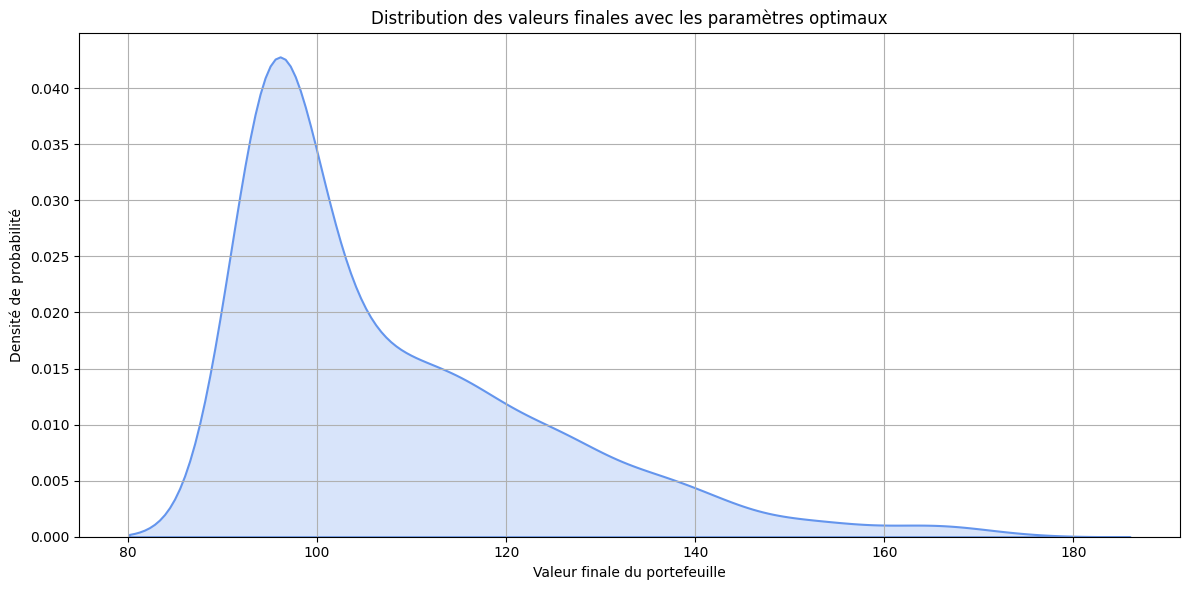


 Paramètres optimaux trouvés :
– volatilité = 0.2
– plancher garanti = 0.94
– tolérance = 0.05
– fréquence de recomposition = 100
– ratio de Sharpe = 0.4902


In [68]:
# Simulateur d'actif
class AssetSimulator:
    def __init__(self, S0, r, sigma, T, N):
        self.S0 = S0
        self.r = r
        self.sigma = sigma
        self.T = T
        self.N = N
        self.dt = T / N

    def simulate_path(self):
        Z = np.random.normal(0, 1, self.N)
        log_returns = (self.r - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * Z
        log_price = np.log(self.S0) + np.cumsum(log_returns)
        return np.exp(log_price)

# Stratégie Stop-Loss dynamique avec fréquence de recomposition
class StopLossStrategy:
    def __init__(self, S0, r, T, tolerance, freq_rebalance):
        self.S0 = S0
        self.r = r
        self.T = T
        self.tolerance = tolerance
        self.freq_rebalance = freq_rebalance

    def apply(self, price_path):
        N = len(price_path)
        t = np.linspace(0, self.T, N)
        floor = (1 - self.tolerance) * self.S0 * np.exp(-self.r * (self.T - t))
        position = 'risky'
        values = []

        rebalance_step = max(1, int(N / self.freq_rebalance))

        for i in range(N):
            price = price_path[i]
            if i % rebalance_step == 0:
                if position == 'risky':
                    val = price
                    if val < floor[i]:
                        val = floor[i]
                        position = 'safe'
                else:
                    val = floor[i]
                    if price > floor[i]:
                        val = price
                        position = 'risky'
            else:
                val = price if position == 'risky' else floor[i]

            values.append(val)

        return values[-1]

# Calcul du ratio de Sharpe
def calculate_sharpe(values):
    returns = np.array(values) / 100 - 1  # rendement simple par rapport à S0
    mean = np.mean(returns)
    std = np.std(returns)
    return mean / std if std > 0 else -np.inf

# Recherche des paramètres optimaux
def find_best_parameters():
    S0 = 100
    r = 0.02
    T = 1
    N = 252
    n_simulations = 500

    # Grilles à tester
    sigmas = [0.1, 0.2]
    floor_pcts = [0.9, 0.92, 0.94, 0.96, 0.98]
    tolerances = [0.05, 0.1, 0.15, 0.2]
    freq_rebalances = [50, 100, 252]

    best_sharpe = -np.inf
    best_params = {}
    best_values = []

    for sigma, floor_pct, tolerance, freq_rebalance in product(sigmas, floor_pcts, tolerances, freq_rebalances):
        final_vals = []
        for _ in range(n_simulations):
            sim = AssetSimulator(S0, r, sigma, T, N)
            path = sim.simulate_path()
            strategy = StopLossStrategy(S0, r, T, tolerance, freq_rebalance)
            val = strategy.apply(path)
            final_vals.append(val)

        sharpe = calculate_sharpe(final_vals)

        if sharpe > best_sharpe:
            best_sharpe = sharpe
            best_params = {
                'volatilité': sigma,
                'plancher garanti': floor_pct,
                'tolérance': tolerance,
                'fréquence de recomposition': freq_rebalance,
                'sharpe': sharpe
            }
            best_values = final_vals

    return best_params, best_values

# Tracé de la distribution
def plot_distribution(values, params):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(values, fill=True, color="cornflowerblue", linewidth=1.5)
    plt.title("Distribution des valeurs finales avec les paramètres optimaux")
    plt.xlabel("Valeur finale du portefeuille")
    plt.ylabel("Densité de probabilité")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n Paramètres optimaux trouvés :")
    for k, v in params.items():
        if k != "sharpe":
            print(f"– {k} = {v}")
    print(f"– ratio de Sharpe = {params['sharpe']:.4f}")

# Exécution globale
params, final_values = find_best_parameters()
plot_distribution(final_values, params)
